In [136]:
import torch
import numpy as np
import matplotlib.pyplot as plt

In [137]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
import torchvision
from torchvision import datasets, transforms
import matplotlib.pyplot as plt
import numpy as np

In [138]:
def transform(x, theta):
  x_c = x.unsqueeze(0)
  theta = theta.unsqueeze(0)
  grid = F.affine_grid(theta, x_c.size())
  x = F.grid_sample(x_c, grid)
  return x[0]

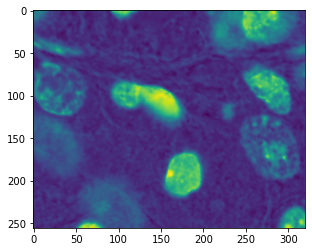

In [139]:
x = 1 - torchvision.io.read_image('test_input.png', torchvision.io.ImageReadMode.GRAY)
x = x.float()
plt.imshow(x[0])

/home/marinbenc/miniconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:4065: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(
/home/marinbenc/miniconda3/envs/pytorch/lib/python3.8/site-packages/torch/nn/functional.py:4003: UserWarning: Default grid_sample and affine_grid behavior has changed to align_corners=False since 1.3.0. Please specify align_corners=True if the old behavior is desired. See the documentation of grid_sample for details.
  warnings.warn(


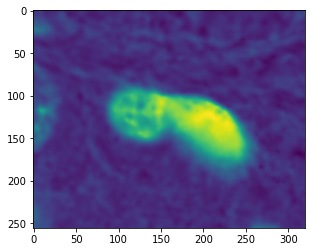

In [140]:
theta = [
  [0.5, 0, -0.2],
  [0, 0.5, -0.2],
  [0, 0, 1]
]

theta = torch.tensor(theta, dtype=torch.float)

x_t = transform(x, theta[:2])
plt.imshow(x_t[0])

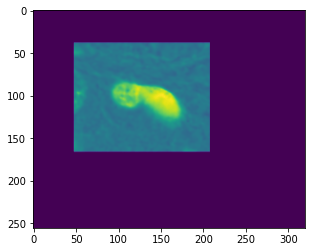

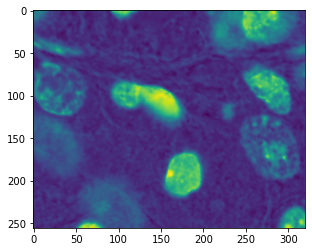

In [141]:
theta_prime = torch.inverse(theta)
x_t_prime = transform(x_t, theta_prime[:2])
plt.imshow(x_t_prime[0])
plt.show()
plt.imshow(x[0])

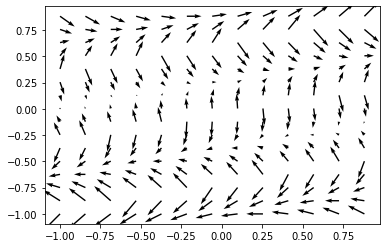

In [144]:
theta = [
  [1, 0, 0],
  [0, 1, 0],
]

theta = torch.tensor(theta, dtype=torch.float)

theta_plot = theta.unsqueeze(0)
grid = F.affine_grid(theta_plot, x.unsqueeze(0).size())

shape = x.unsqueeze(0).size()[-2:]
sampling = 20

x_ = np.linspace(-1, 1, shape[0])
y_ = np.linspace(-1, 1, shape[1])
X, Y = np.meshgrid(x_[::sampling], y_[::sampling])
u, v = grid[0, :, :, 1][::sampling, ::sampling], grid[0, :, :, 0][::sampling, ::sampling]
plt.quiver(X, Y, u, v)

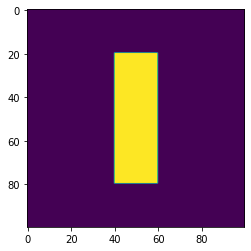

In [163]:
label_size = 100
label = np.zeros((label_size, label_size))
label[20:80, 40:60] = 1
label = torch.from_numpy(label).float().unsqueeze(0)
plt.imshow(label[0])

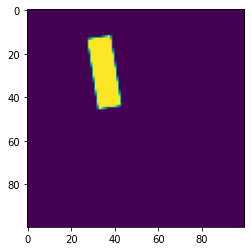

In [6]:
import albumentations as A
import cv2

transform = A.ShiftScaleRotate(shift_limit=0.25, scale_limit=(-0.5, 0.1), rotate_limit=90, p=1, border_mode=cv2.BORDER_CONSTANT, interpolation=cv2.INTER_AREA)
transformed = transform(image=label.numpy()[0])
plt.imshow(transformed['image'])

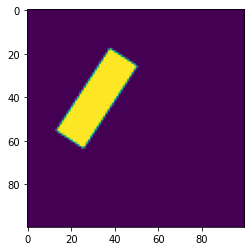

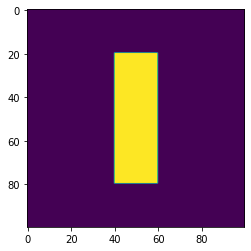

In [9]:
from toy_dataset import ToyDataset
import matplotlib.pyplot as plt

dataset = ToyDataset()
image, label = dataset[0]
plt.imshow(image[0])
plt.show()
plt.imshow(label[0])